In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance



In [5]:
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [6]:
data = pd.read_csv('features.csv')
#usecols=['churn_yn','longest_time_between_events', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
data = data.drop(['enterworld_num','buyitemnowmainauction_num','completechallengeweek_num'],axis=1)
data = data.drop(['actor_account_id','survival_time'],axis=1)
data = data.drop(columns=data.columns[0],axis=1)
X = data.copy()
y = X.pop('churn_yn')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [7]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(995, 33) (995,)
(2985, 33) (2985,)


In [8]:
clf = DecisionTreeClassifier(criterion='gini', 
    splitter='best', 
    max_depth=4, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=20, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [9]:
#F1-score
print("F1 Score")
print('f1 ' , f1_score(y_test, predictions))
#Cross validation
scores = cross_val_score(clf, X, y, cv=5)
print("CrossValidation Scores: ")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 Score
f1  0.49898580121703856
CrossValidation Scores: 
[0.7839196  0.74748744 0.76884422 0.75628141 0.73994975]
0.76 accuracy with a standard deviation of 0.02


[Text(0.5, 0.9, 'X[19] <= 17439903.0\ngini = 0.419\nsamples = 2985\nvalue = [2093, 892]'),
 Text(0.25, 0.7, 'X[3] <= 46.5\ngini = 0.486\nsamples = 857\nvalue = [357, 500]'),
 Text(0.125, 0.5, 'X[29] <= 5814.52\ngini = 0.33\nsamples = 254\nvalue = [53, 201]'),
 Text(0.0625, 0.3, 'X[11] <= 2.0\ngini = 0.296\nsamples = 227\nvalue = [41, 186]'),
 Text(0.03125, 0.1, 'gini = 0.472\nsamples = 42\nvalue = [16, 26]'),
 Text(0.09375, 0.1, 'gini = 0.234\nsamples = 185\nvalue = [25, 160]'),
 Text(0.1875, 0.3, 'X[26] <= 1565.95\ngini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(0.15625, 0.1, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.21875, 0.1, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.375, 0.5, 'X[1] <= 27.5\ngini = 0.5\nsamples = 603\nvalue = [304, 299]'),
 Text(0.3125, 0.3, 'X[24] <= 36.5\ngini = 0.482\nsamples = 296\nvalue = [176, 120]'),
 Text(0.28125, 0.1, 'gini = 0.496\nsamples = 256\nvalue = [139, 117]'),
 Text(0.34375, 0.1, 'gini = 0.139\nsamples = 40\nvalue 

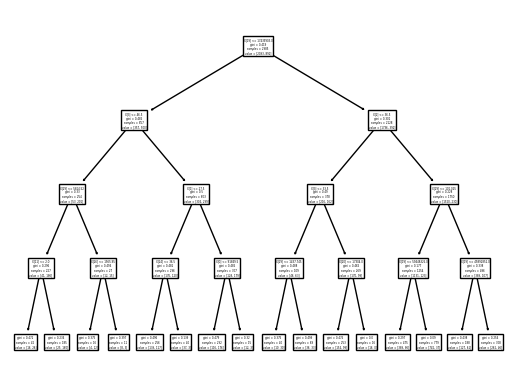

In [10]:
tree.plot_tree(clf)

In [14]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

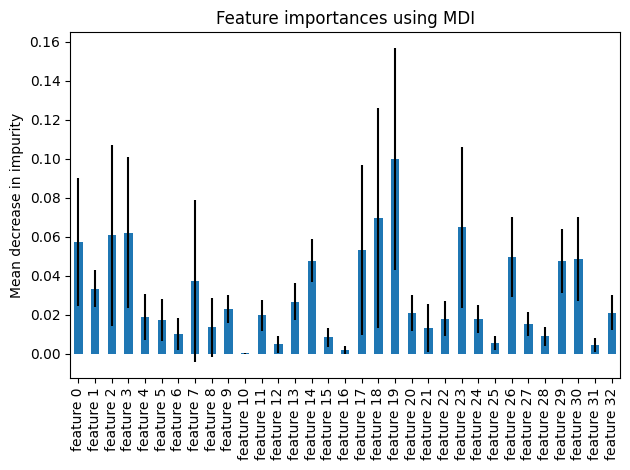

In [16]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

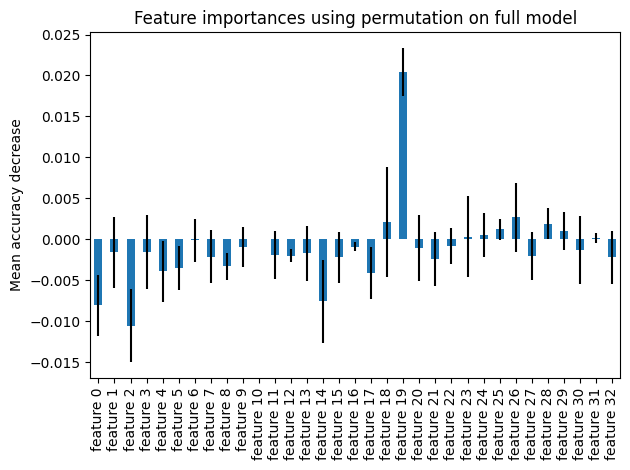

In [18]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [22]:
print("Top 10 features:")
for importance, name in sorted(zip(forest.feature_importances_, X_train.columns),reverse=True)[:10]:
    print (name, importance)

Top 10 features:
masteryexp 0.09986111626783833
sessions_num 0.06951636156711967
money_max 0.06495130291792163
spendmoney_num 0.06204633602546378
joinparty_num 0.060751321387464155
event_num 0.057441780212969674
targetaccountid_num 0.053098044640500684
average_money_spent_per_session 0.04970583391245898
average_time_between_logins 0.048536130252650356
longest_time_between_events 0.04765184943203833
